In [698]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Context

Exploratory Data Analysis (EDA) на примере ["синтетических" данных о пассажирах последнего рейса "Титаника](https://www.kaggle.com/c/tabular-playground-series-apr-2021/data) - одного из самых печально известных кораблекрушений в истории. В 1912 году во время своего плавания "Титаник" затонул после столкновения с айсбергом, в результате чего погибли 1502 из 2224 пассажиров и членов экипажа.

Целью EDA является оценка качества данных и выявление зависимостей между переменными-предикторами и целевым признаком `Survived` (Выживаемость).

## Содержание
- Импорт данных
- Анализ качества и типов данных: 
    - Размер датафрэйма 
    - Признаки
    - Поля с пропущенныеми данными 
    - Дубликаты
    - Новые поля
- Анализ категориальных и числовых (дискретных) переменных
- Анализ числовых (непрерывных) переменных
- Корреляционный анализ
- Выводы

In [699]:
# загрузка датасета
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S



### Словарь данных

|Колонка|Описание|Значения| 
|:------|:------|:------|
| Survived | Выжил или нет | 0 = Нет, 1 = Да |
| Pclass | Класс билета | 1 = 1 класс, 2 = 2 класс, 3 = 3 класс |
| Name | Имя пассажира |  |
| Sex | Пол: male female |  |
| Age | Возраст в годах |  |
| SibSp | Количество братьев-сестёр/супругов на борту, sibling/spouse |  |
| Parch | Количество детей/родителей пассажира на борту, parent/children |  |
| Ticket | Номер билета |  |
| Fare | Плата за проезд |  |
| Cabin | Номер каюты |  |
| Embarked | Порт посадки на корабль | (C = Cherbourg, Q = Queenstown, S = Southampton)  |



### Примечания к переменным

`Pclass`: Доступность для социально-экономического статуса (SES)
	1st = Upper
	2nd = Middle
	3rd = Lower

`Age`: Возраст является дробным, если он меньше 1. Если же возраст больше 1, то он в виде xx.5 (с точностью до полугода)

`Sibsp`: Набор данных, определяющий следующие семейные отношения (горизонтальные):
	Sibling = брат, сестра, сводный брат, сводная сестра
	Spouse = муж, жена (любовницы и женихи игнорировались)

`Parch`: Набор данных, определяющий следующие семейные отношения (вертикальные):
	Parent = отец, мать
	Child = дети: дочь, сын, падчерица, пасынок
(Некоторые дети путешествовали только с няней, поэтому для них parch=0)

# Data quality assessment

### Анализ качества и типов данных 

#### Размер датафрэйма:

100 000 строк

11 полей

#### Признаки:

числовые (непрерывные): `Age`, `Fare`

числовые (дискретные): `Survived`, `Pclass`, `SibSp`, `Parch`  

категориальные: `Sex`, `Embarked`

текстовые: `Name`, `Ticket`, `Cabin`


#### Поля с пропущенныеми данными

`Age` (3.292% от всех)

`Ticket` (4.623)

`Fare` (0.134%)

`Cabin` (67.866%)

`Embarked` (0.250%)

#### Дубликаты

отсутствуют

#### !Новое поле

добавлено новое поле `Sex_code` со значениями [1, 2], где 0 - male из `Sex`, 1 - female из `Sex`

In [700]:
# размер датафрэйма и типы данных
df = pd.read_csv('train.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [701]:
# пропущенные значения 
missing_percentages = (df[df.columns].isnull().sum() / df.shape[0]) * 100
missing_percentages

Survived     0.000
Pclass       0.000
Name         0.000
Sex          0.000
Age          3.292
SibSp        0.000
Parch        0.000
Ticket       4.623
Fare         0.134
Cabin       67.866
Embarked     0.250
dtype: float64

In [702]:
# уникальные значения 
for i in df.columns:
    print("Кол-во уникальных значений в {} - {}".format(i, len(df[i].unique())))

Кол-во уникальных значений в Survived - 2
Кол-во уникальных значений в Pclass - 3
Кол-во уникальных значений в Name - 92144
Кол-во уникальных значений в Sex - 2
Кол-во уникальных значений в Age - 174
Кол-во уникальных значений в SibSp - 7
Кол-во уникальных значений в Parch - 8
Кол-во уникальных значений в Ticket - 75332
Кол-во уникальных значений в Fare - 15936
Кол-во уникальных значений в Cabin - 26993
Кол-во уникальных значений в Embarked - 4


In [703]:
# Проверка на дубликаты
df.duplicated().sum()

0

In [704]:
# Меры центральной тендеции
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,100000.0,NaN,NaN,NaN,0.42774,0.494753,0.0,0.0,0.0,1.0,1.0
Pclass,100000.0,NaN,NaN,NaN,2.10691,0.837727,1.0,1.0,2.0,3.0,3.0
Name,100000,92144,"Johnson, John",31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,100000,2,male,56114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,96708.0,NaN,NaN,NaN,38.355472,18.313556,0.08,25.0,39.0,53.0,87.0
SibSp,100000.0,NaN,NaN,NaN,0.39769,0.862566,0.0,0.0,0.0,1.0,8.0
Parch,100000.0,NaN,NaN,NaN,0.45456,0.950076,0.0,0.0,0.0,1.0,9.0
Ticket,95377,75331,A/5,602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,99866.0,NaN,NaN,NaN,43.92933,69.58882,0.68,10.04,24.46,33.5,744.66
Cabin,32134,26992,C19828,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [705]:
# добавлено новое поле 'Sex_code' со значениями [0, 1], где 0 - male из 'Sex', 1 - female из 'Sex'
d={'male':0, 'female':1}
df['Sex_code']=df['Sex'].apply(lambda x:d[x])

# Data exploration

### Анализ категориальных и числовых (дискретных) переменных
- `Survived` : общее кол-во погибших (57 226 или 57.2%) превышает кол-во выживших (42 774 или 42.8%);
- `Sex` : на борту мужчин (56 114 или 56.1%) было больше чем женщин (43 886 или 43.9%);
- `Pclass` : большинство пассажиров плыли 3 классом (41 006 или 41.0%), 1 и 2 - практически поровну (30 315 или 30.3% и 28 679 или 28.7% соответственно);
- `Embarked` : место посадки большинства пассажиров был Southampton (72 139 или 72.1%), затем Cherbourg (22 187 или 22.2%) и незначительная часть пассажиров села в Queenstown (5 424 или 5.4%). Учитывая, что % пропущенных значений признака незначительный (0.25%) пропущенные значения предлагается заполнить модой;
- `SibSp` : большинство пассажиров не имело родственников на борту (73 308 или 73.3%) либо имело 1 родственника (19 758 или 19.6%) или 2 (3 703 или 3.7%)
- `Parch` : большинство пассажиров не имело детей на борту (73 540 или 73.5%) либо имело 1 ребенка (12 996 или 13.0%) или 2 (11 236 или 11.2%)
- ! добавлено новое поле `FamilySize` для определения размера семьи как сумма значений `SibSp`&`Parch`+1

In [706]:
# распределение категориальных и числовых (дискретных) переменных
print(pd.pivot_table(df, columns = 'Survived', values = 'Name' , aggfunc='count'))
print()
print(pd.pivot_table(df, columns = 'Sex', values = 'Name' , aggfunc='count'))
print()
print(pd.pivot_table(df, columns = 'Pclass', values = 'Name' , aggfunc='count'))
print()
print(pd.pivot_table(df, columns = 'Embarked', values = 'Name' , aggfunc='count'))
print()
print(pd.pivot_table(df, columns = 'SibSp', values = 'Name' , aggfunc='count'))
print()
print(pd.pivot_table(df, columns = 'Parch', values = 'Name' , aggfunc='count'))
print()

Survived      0      1
Name      57226  42774

Sex   female   male
Name   43886  56114

Pclass      1      2      3
Name    30315  28679  41006

Embarked      C     Q      S
Name      22187  5424  72139

SibSp      0      1     2     3     4    5    8
Name   73308  19758  3703  1635  1168  132  296

Parch      0      1      2    3    4    5    6    9
Name   73540  12996  11236  983  446  331  204  264



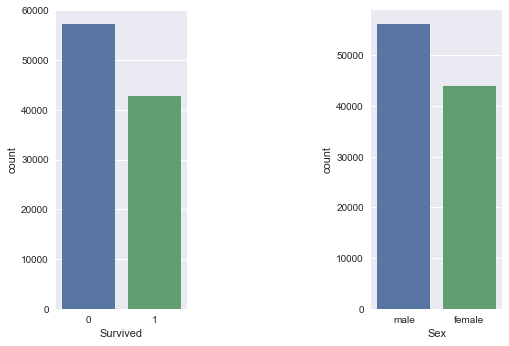

In [707]:
# распределение 'Survived', 'Sex'
plt.subplot(1,3,1)
figsize=(20, 20)
ax = sns.countplot(x="Survived",data=df)
plt.subplot(1,3,3)
ax = sns.countplot(x="Sex",data=df)

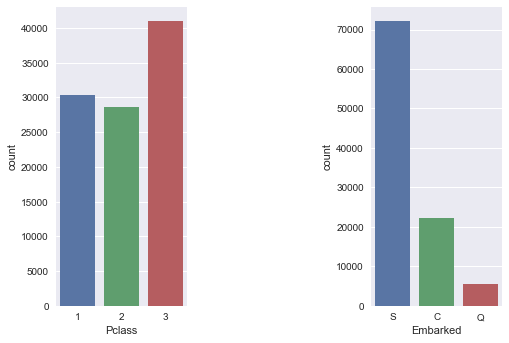

In [708]:
# распределение 'Pclass','Embarked'
plt.subplot(1,3,1)
figsize=(20, 20)
ax = sns.countplot(x="Pclass",data=df)
plt.subplot(1,3,3)
ax = sns.countplot(x="Embarked",data=df)

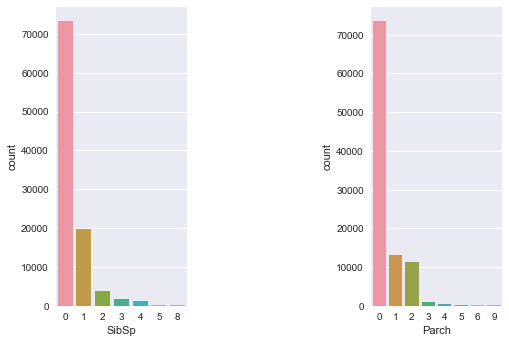

In [709]:
# распределение 'SibSp','Parch'
plt.subplot(1,3,1)
figsize=(20, 20)
ax = sns.countplot(x="SibSp",data=df)
plt.subplot(1,3,3)
ax = sns.countplot(x="Parch",data=df)

In [710]:
# замена пропущенных значений в 'Embarked' модой
df.Embarked.fillna('S', inplace=True)

In [711]:
# добавлено новое поле `FamilySize` для определения размера семьи как сумма значений `SibSp`&`Parch`+1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 

### Анализ числовых (непрерывных) переменных
- `Age` : признак имеет мультимодальное распределение. При этом медиана и среднее практически равны: 39.0 и 38.4 соответственно. Пропущенные значения предлагается заполнить медианой;
- `Fare` : признак имеет значительное кол-во выбросов. Медиана и среднее составляют 24.5 и 43.9 соответственно. Учитывая в том числе, что % пропущенных значений признака незначительный (0.13%) пропущенные значения предлагается заполнить медианой. Для уменьшения влияния выбросов в 'Fare' применена логарифмическая функция. Поскольку существует большое количество выбросов, их удаление приведет к потере большого количества записей.

<AxesSubplot:>

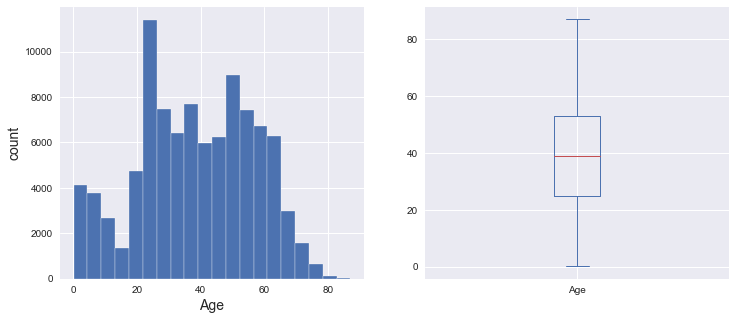

In [712]:
plt.subplot(1,2,1)
df['Age'].hist(figsize=(12,5),bins=20,edgecolor='white')
plt.xlabel('Age',fontsize=14)
plt.ylabel('count',fontsize=14)

plt.subplot(1,2,2)
df['Age'].plot.box(figsize=(12,5))

In [713]:
# медиана и среднее по `Age`
print ('медиана:',df.Age.median()) 
print ('среднее:',df.Age.mean())

медиана: 39.0
среднее: 38.35547214294577


<AxesSubplot:>

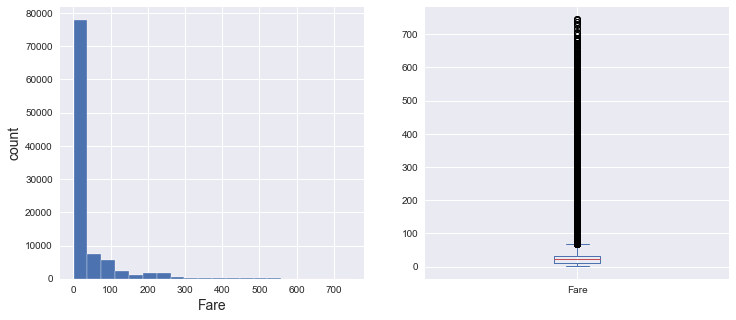

In [714]:
plt.subplot(1,2,1)
df['Fare'].hist(figsize=(12,5),bins=20,edgecolor='white')
plt.xlabel('Fare',fontsize=14)
plt.ylabel('count',fontsize=14)

plt.subplot(1,2,2)
df['Fare'].plot.box(figsize=(12,5))

In [715]:
# медиана и среднее по `Fare`
print ('медиана:',df.Fare.median()) 
print ('среднее:',df.Fare.mean())

медиана: 24.46
среднее: 43.92933040273968


In [716]:
# замена пропущенных значений в 'Age' медианой
df.Age = df.Age.fillna(df.Age.median())

In [717]:
# замена пропущенных значений в 'Fare' медианой
df.Fare = df.Fare.fillna(df.Fare.median())

In [718]:
# нормализация 'Fare'
df['Fare'] = df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

### Корреляционный анализ

- добавлено новое поле `Embarked_code` со значениями [0, 1, 2] где 0 - C (Cherbourg) из `Embarked`, 1 - Q (Queenstown) из `Embarked`, 2 -  S (Southampton) из `Embarked`.

- `Sex -- Survived` :
    женищины имели большое шансов выжить (71.2% выживших, 28.8% погибших), у мужчин - обратная тенденция (20.6 и 79.4% соответственно).


- `Pclass -- Survived` : 
    пассижиры, плывшие 1 или 2 классом имели большое шансов выжить (58.0% выживших, 42.0% погибших и 52.5% выживших, 47.5% погибших соответственно), 3 классом - обратная тенденция (24.7% выживших, 75.3% погибших).
    
    
- `Embarked -- Survived` : 
    пассажиры, севшие на рейс в Cherbourg или Queenstown имели большое шансов выжить (58.0% выживших, 42.0% погибших и 52.5% выживших, 47.5% погибших соответственно), в Southampton - обратная тенденция. !Но при этом отмечается, что на рейс в Cherbourg или Queenstown село больше женщин, а также пассажиров плывших 1 и 2 классом, в Southampton - обратная тенденция. То есть, можно преположить, что между переменной `Embarked` и `Survived` нет прямой причинной-следственной связи, `Survived` зависит от характеристик пассажиров (`Sex`, `Pclass`), севших в этих населенных пунктах `Embarked`. Но можно предположить, что `Embarked` влияет на характеристики пассажиров - например, что в Cherbourg живут преимущественно женщины с достатком, которые могут позволить себе плыть 1 классом.
    
    
- `SibSp&Parch (FamilySize) -- Survived` :
    только у семей, состоявших из 2 человек, шансы выжить были немного выше (51.6%), чем погибнуть (48.4%), в остальных группах - обратная тенденция. В целом путешествие одному или с семьей не имеет большой разницы в выживаемости (59.6% и 53.4% соответственно).
    
- `Fare -- Survived` и `Fare -- Pclass` : 
    Чем лучше класс, тем стоимость билета дороже. Поэтому тезис "кто платил больше, тот выживал" - справедлив.
    
    
- `Age -- Survived` и `Age&Pclass -- Survived` :
    В 1 классе в большинстве плыли более взрослые пассажиры, что может говорить о тезисе - "чем взрослее - тем состоятельнее". В 3 классе ехало больше детей и молодых, чем в других классах. Дети 2 класса в большинстве выжили. Большинство пассажиров 1 класса выжили. Пассажиры старше 70 лет в большинстве случаев выжили.
    
    ! добавлено новое поле `Age_bucket` состоящее из 9 возрастных групп по значениям из `Age`;
    
- `Cabine -- Survived` :
    В `Cabine` есть законономерность - начинается с ограниченного количества букв, которые могут обозначать номер палубы. Учитывая большое количество пропущенных значений, пропущенные названия кабин в строках могут означать, что пассажирам не была выделена отдельная кабина, а выделена, например, кабина общего пользования. Выживаемость пассажиров "без кабины" - значительно ниже чем в кабинах с названием (за исключением кабин, начинающихся с 'A' и 'T').
    
    ! добавлено новое поле `Cabin_code` как первый символ из `Cabine` (если Nan - 'N')
    
    
- `Ticket -- Survived` :
    Выявлена зависимость отдельных категорий билетов и уровня выживаемости. 
    
    ! добавлено новое поле `TicketType` сформированное из значений `Ticket` и сгруппированное в зависимости от уровня выживаемости

In [719]:
# добавлено новое поле `Embarked_code` со значениями [0, 1, 2], где 0 - C (Cherbourg) из `Embarked`, 1 - Q (Queenstown) из `Embarked`, 2 -  S (Southampton) из `Embarked`
e={'C':0, 'Q':1, 'S':2}
df['Embarked_code']=df['Embarked'].apply(lambda x:e[x])

In [720]:
# выживаемость в разрезе категориальных и числовых (дискретных) переменных, относительные значения (%)
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Name' , aggfunc='count')
          /df.Sex.value_counts()*100)
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Name' , aggfunc='count')
          /df.Pclass.value_counts()*100)
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Name' ,aggfunc='count')
           /df.Embarked.value_counts()*100)
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'FamilySize', values = 'Name' ,aggfunc='count')
           /df.FamilySize.value_counts()*100)

             female       male
Survived                      
0         28.847468  79.420465
1         71.152532  20.579535

                  1          2          3
Survived                                 
0         42.022101  47.498169  75.269473
1         57.977899  52.501831  24.730527

                 C         Q          S
Survived                               
0         24.87042  40.30236  68.410946
1         75.12958  59.69764  31.589054

                 1          2          3         4          5          6   \
Survived                                                                    
0         59.560571  48.374613  51.756419  59.08059  66.470588  55.965463   
1         40.439429  51.625387  48.243581  40.91941  33.529412  44.034537   

                7          8          9         10        11    12         13  \
Survived                                                                        
0         67.46988  73.076923  74.774775  54.77707  58.59375  55.0  71.428

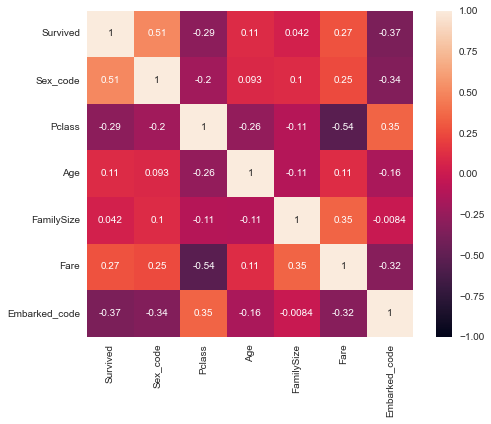

In [721]:
# корреляционный анализ переменных
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(df[['Survived','Sex_code','Pclass','Age','FamilySize','Fare', 'Embarked_code']].corr(method='spearman'), annot=True, square=True, vmin=-1, vmax=1)#

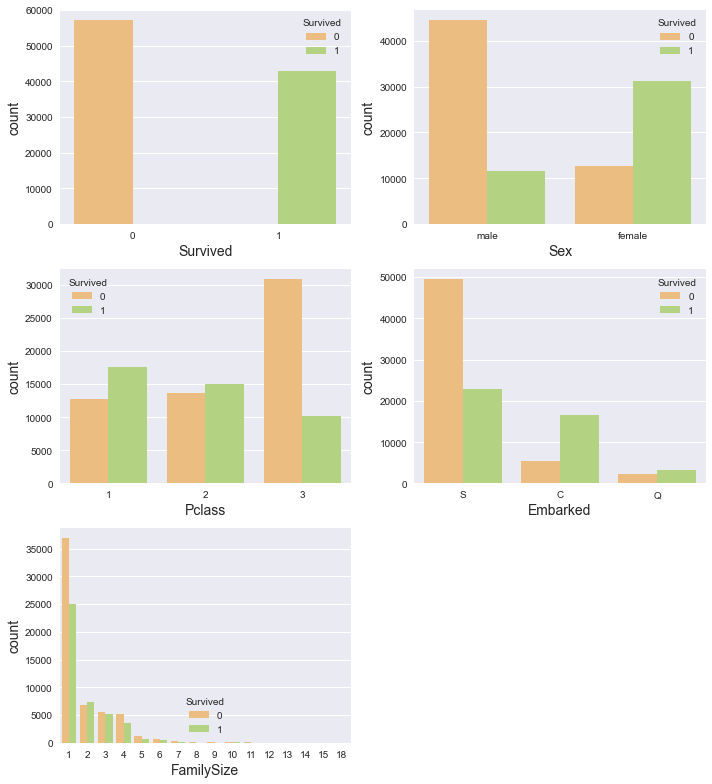

In [722]:
# выживаемость в разрезе категориальных и числовых (дискретных) переменных, абсолютные значения
cols=['Survived', 'Sex', 'Pclass', 'Embarked', 'FamilySize']
plt.style.use('seaborn')
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(3,2,i+1)
    fig.set_size_inches(10,11)
    sns.countplot(x=col,data=df,hue='Survived',palette='RdYlGn')
    plt.xlabel(col,fontsize=14)
    plt.ylabel('count',fontsize=14) 
    plt.tight_layout()

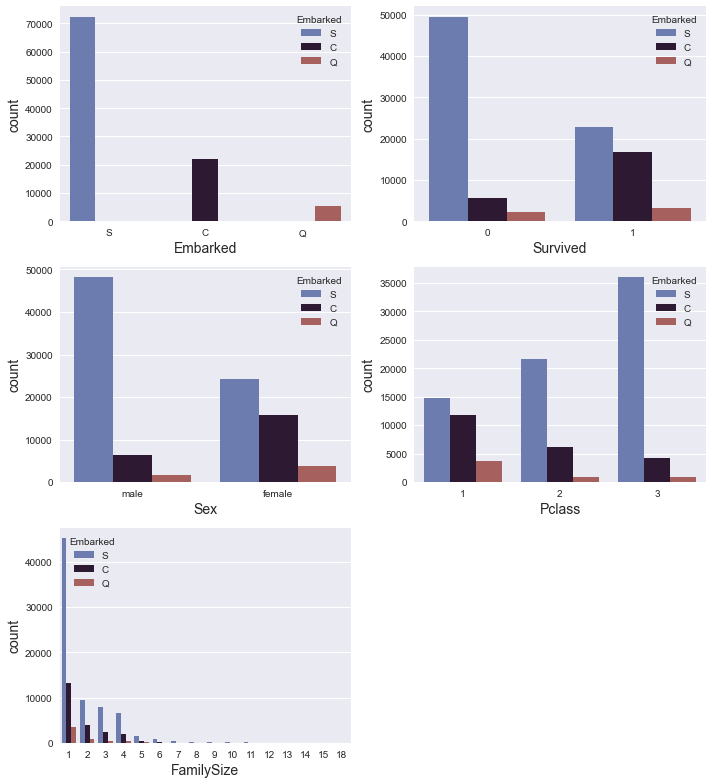

In [723]:
# переменные по признаку места посадки 'Embarked'
cols=['Embarked', 'Survived', 'Sex', 'Pclass','FamilySize']

plt.style.use('seaborn')
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(3,2,i+1)
    fig.set_size_inches(10,11)
    sns.countplot(x=col,data=df,hue='Embarked',palette='twilight')
    plt.xlabel(col,fontsize=14)
    plt.ylabel('count',fontsize=14)
    plt.tight_layout()

In [724]:
# группировка пассажира по признаку "одинокий"-"с семьей"
# путешествие одному или с семьей не имеет большой разницы в выживаемости
def family_size(x):
    if x == 1:
        return "alone"
    else:
        return "notalone"
df_mode=df
df_mode["Group"] = df["FamilySize"].apply(family_size)
print(pd.pivot_table(df_mode, index = 'Survived', columns = 'Group', values = 'Name' ,aggfunc='count')
           /df_mode.Group.value_counts()*100)

Group         alone   notalone
Survived                      
0         59.560571  53.440638
1         40.439429  46.559362


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

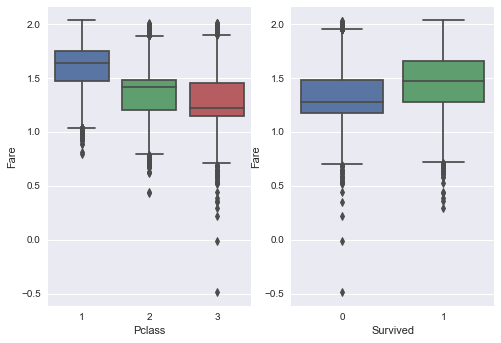

In [725]:
# `Fare -- Survived` и `Fare -- Pclass`
# логично, что чем лучше класс, тем стоимость дороже.
# поэтому тезис "кто платил больше тот выживал" - справедлив.
plt.subplot(1,2,2)

sns.boxplot(x= df.Survived, y= np.log(1+df.Fare))
plt.subplot(1,2,1)
sns.boxplot(x= df.Pclass, y= np.log(1+df.Fare))

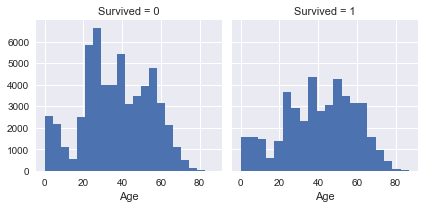

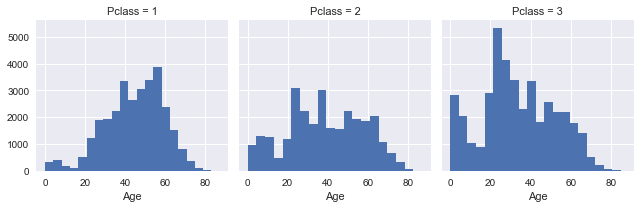

In [726]:
# Зависисость `Age -- Survived` и `Age -- Pclass`
# В 1 классе в большинстве плыли более взрослые пассажиры, что может говорить о тезисе - "чем взрослее - тем состоятельнее"
# В 3 классе ехало больше детей и молодых чем в других классах

g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
g = sns.FacetGrid(df, col='Pclass')
g.map(plt.hist, 'Age', bins=20)

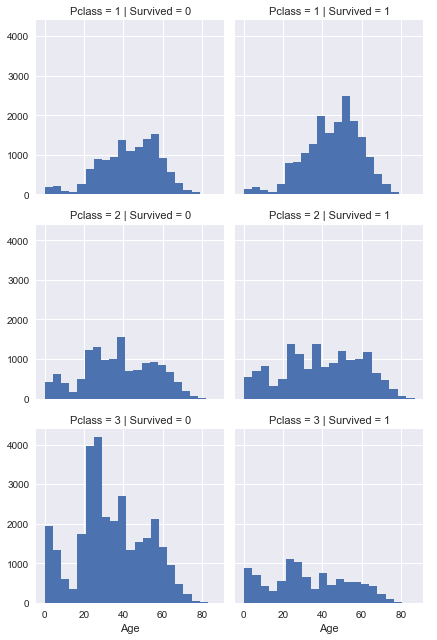

In [727]:
# Зависисость `Age&Pclass -- Survived`
#Дети 2 класса в большинстве выжили.
#Большинство пассажиров 1 класса выжили.

grid = sns.FacetGrid(df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

In [728]:
# доля выживших по возрастным группам
# пассажиры старше 70 лет в большинстве случаев выжили
df["Age_bucket"] = pd.cut(df["Age"], 9, 
                                  labels=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])
print(pd.pivot_table(df, index = 'Survived', columns = 'Age_bucket', values = 'Name' , aggfunc='count')
          /df.Age_bucket.value_counts()*100)

                0-9      10-19      20-29      30-39      40-49      50-59  \
Survived                                                                     
0         59.574962  54.865839  66.655155  62.414419  54.050294  53.158039   
1         40.425038  45.134161  33.344845  37.585581  45.949706  46.841961   

              60-69      70-79      80-89  
Survived                                   
0         50.721796  39.714036  23.963134  
1         49.278204  60.285964  76.036866  


In [729]:
# в назавании кабины есть законономерность - начинается с огранич количества букв, которые могут обозначать номер палубы
# учитывая большое количество пропущенных значений, пропущенные названия кабин в строках могут означать, что пассажирам не была выделена отдельная кабина, а например кабина общего пользования 
# выживаемость пассажиров "без кабины" - значительно ниже чем в кабинах с названием (за исключением кабин, начинающихся с 'A' и 'T')
df["Cabin"] = df["Cabin"].fillna("N/A")
df["Cabin_code"] = df["Cabin"].str[0]
print(pd.pivot_table(df, index = 'Survived', columns = 'Cabin_code', values = 'Name' , aggfunc='count')
         /df.Cabin_code.value_counts()*100)

                  A          B          C          D          E          F  \
Survived                                                                     
0         72.538449  36.980777  28.778013  26.780313  38.250429  16.289593   
1         27.461551  63.019223  71.221987  73.219687  61.749571  83.710407   

                  G          N      T  
Survived                               
0         16.390041  65.789939  56.25  
1         83.609959  34.210061  43.75  


In [730]:
# Некоторые номера билетов имеют специальные буквенные символы, такие как A/5, CA, SC PARIS и т.д., в то время как многие просто цифровые. 
# Это может означать некоторую категоризацию билетов специального класса.
# Билеты с одними цифрами, а также пустые значения названы 'XX'.
# Для более компактного вида из названий билетов убраны знаки (точки, слэши)

df['TicketType'] = df.Ticket.fillna('XX')
df['TicketType'] = df.TicketType.map(lambda x:str(x).split()[0] if len(str(x).split()) > 1 else 'XX')
df['TicketType'] = df['TicketType'].str.lower()
import re
df['TicketType'] = df.TicketType.map(lambda x: re.sub("[^\w\s]+","",x))

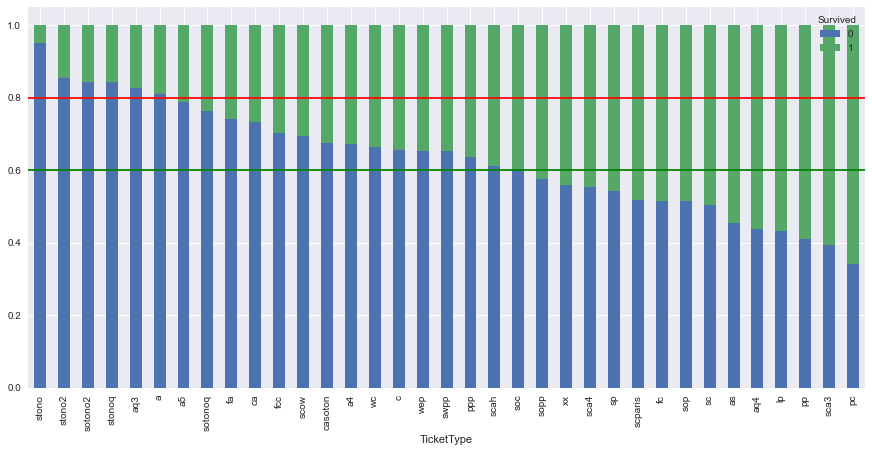

In [731]:
# Прослеживается корреляция категории билетов и выживаемости
pd.crosstab(index= df.TicketType, columns= df.Survived, normalize='index' ). \
sort_values(by = 1).plot.bar(figsize=(15, 7),stacked = True)

plt.axhline(y = 0.8, color = 'r', linestyle = '-')
plt.axhline(y = 0.6, color = 'g', linestyle = '-')

In [732]:
# Категории билетов сгруппированы по коэффициенту выживаемости (свыше 80%, от 60% до 80%, менее 45% и иные)
df['TT_bucket'] = df.TicketType.map(lambda x: 0 if x in ['pc','sca3','pp','lp','aq4','as'] else 3 if x in ['stono', 'stono2', 'sotono2', 'stonoq', 'aq3', 'a', 'a5'] else 2 if \
                                             x in ['sotonoq', 'fa', 'ca', 'fcc', 'scow', 'casoton', 'a4', 'wc', 'c', 'wep', 'swpp','ppp'] else 1)

df['TT_bucket'].value_counts()

1    79847
0     7165
3     7163
2     5825
Name: TT_bucket, dtype: int64

# Summary

### Анализ качества и типов данных
- Анализ качества данных показал приемлемый уровень для последующего их использования;
- Выявлены признаки с пустыми значениями `Age` (3.292% от всех), `Ticket` (4.623), `Fare` (0.134%), `Cabin` (67.866%), `Embarked` (0.250%);
- `Age` и `Fare` заполнены медианой. Ввиду наличия больших выбросов для `Fare` применена логарифмическая функция;
- `Embarked` заполнен модой;
- Анализ пустых значений в `Ticket` и `Cabin` проводился как для отдельной группы.
- Добавлено новое поле `Sex_code` со значениями [1, 2], где 0 - male из `Sex`, 1 - female из `Sex`;
- Добавлено новое поле `FamilySize` для определения размера семьи как сумма значений `SibSp`&`Parch`+1;
- Добавлено новое поле `Group` со значениями ['notalone', 'alone'], где 'alone' для `FamilySize`=1,'notalone' для `FamilySize`>1;
- Добавлено новое поле `Embarked_code` со значениями [0, 1, 2] где 0 - C (Cherbourg) из `Embarked`, 1 - Q (Queenstown) из `Embarked`, 2 -  S (Southampton) из `Embarked`;
- Добавлено новое поле `Age_bucket` состоящее из 9 возрастных групп по значениям из `Age`;
- Добавлено новое поле `Cabin_code` как первый символ из `Cabine` (если Nan - 'N');
- Добавлено новое поле `TicketType` сформированное из значений `Ticket` 
- Добавлено новое поле `TT_bucket` сформированное из значений `TicketType` и сгруппированное в зависимости от уровня выживаемости.

### Корреляционный анализ
   Выявлены следующие зависимости
- `Sex -- Survived` :
    женищины имели большое шансов выжить (71.2% выживших, 28.8% погибших), у мужчин - обратная тенденция (20.6 и 79.4% соответственно).

- `Pclass -- Survived` : 
    пассижиры, плывшие 1 или 2 классом имели большое шансов выжить (58.0% выживших, 42.0% погибших и 52.5% выживших, 47.5% погибших соответственно), 3 классом - обратная тенденция (24.7% выживших, 75.3% погибших).
      
- `Embarked -- Survived` : 
    пассажиры, севшие на рейс в Cherbourg или Queenstown имели большое шансов выжить (58.0% выживших, 42.0% погибших и 52.5% выживших, 47.5% погибших соответственно), в Southampton - обратная тенденция. !Но при этом отмечается, что на рейс в Cherbourg или Queenstown село больше женщин, а также пассажиров плывших 1 и 2 классом, в Southampton - обратная тенденция. То есть, можно преположить, что между переменной `Embarked` и `Survived` нет прямой причинной-следственной связи, `Survived` зависит от характеристик пассажиров (`Sex`, `Pclass`), севших в этих населенных пунктах `Embarked`. Но можно предположить, что `Embarked` влияет на характеристики пассажиров - например, что в Cherbourg живут преимущественно женщины с достатком, которые могут позволить себе плыть 1 классом.
    
- `SibSp&Parch (FamilySize) -- Survived` :
    только у семей, состоявших из 2 человек, шансы выжить были немного выше (51.6%), чем погибнуть (48.4%), в остальных группах - обратная тенденция. В целом путешествие одному или с семьей не имеет большой разницы в выживаемости (59.6% и 53.4% соответственно).
    
- `Fare -- Survived` и `Fare -- Pclass` : 
    Чем лучше класс, тем стоимость билета дороже. Поэтому тезис "кто платил больше, тот выживал" - справедлив.
    
- `Age -- Survived` и `Age&Pclass -- Survived` :
    В 1 классе в большинстве плыли более взрослые пассажиры, что может говорить о тезисе - "чем взрослее - тем состоятельнее". В 3 классе ехало больше детей и молодых, чем в других классах. Дети 2 класса в большинстве выжили. Большинство пассажиров 1 класса выжили. Пассажиры старше 70 лет в большинстве случаев выжили.
    
- `Cabine -- Survived` :
    Выявлена зависимость отдельных кабин и уровня выживаемости. Выживаемость пассажиров "без кабины" - значительно ниже чем в кабинах с названием.
      
- `Ticket -- Survived` :
    Выявлена зависимость отдельных категорий билетов и уровня выживаемости. 